In [7]:
import obspy
import os
import pickle
import datetime
import seisbench
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from picks_comparison import Picks_Comparison
import warnings
warnings.filterwarnings('ignore')


In [8]:
start_year_analysis = 2011
start_day_analysis = 90
end_year_analysis = 2011
end_day_analysis = 90
time_lag_threshold = 500 # mi second

catalog = 'IPOC'
GT = 'Hand-picked'
title = '{0}{1}{2}{3}{4}'.format(catalog,' catalog', ' and Ground truth (',GT,') Comparison' )

if GT =='IPOC':

    Ground_truth_file_path_p = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_p_picks.pkl'
    with open(Ground_truth_file_path_p,'rb') as fp:
        Ground_truth_p = pickle.load(fp)

    Ground_truth_file_path_s = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_s_picks.pkl'
    with open(Ground_truth_file_path_s,'rb') as fp:
        Ground_truth_s = pickle.load(fp)
    

    Ground_truth = pd.concat([Ground_truth_p, Ground_truth_s], axis=0)
    Ground_truth.sort_values(by=['picks_time'], inplace=True)

    Ground_truth.drop(columns=['picks_uncertainty','origins_time', 'origins_longitude', 'origins_latitude','magnitudes'], errors='ignore', inplace=True)

if GT =='Hand-picked':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jonas/picks_2011_090_cleaned.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)



if catalog =='IPOC':

    catalog_file_path_p = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_p_picks.pkl'
    with open(catalog_file_path_p,'rb') as fp:
        catalog_p = pickle.load(fp)

    catalog_file_path_s = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_s_picks.pkl'
    with open(catalog_file_path_s,'rb') as fp:
        catalog_s = pickle.load(fp)
    

    event_picks = pd.concat([catalog_p, catalog_s], axis=0)
    event_picks.sort_values(by=['picks_time'], inplace=True)

    event_picks.drop(columns=['picks_uncertainty','origins_time', 'origins_longitude', 'origins_latitude','magnitudes'], errors='ignore', inplace=True)



if catalog == 'Hand-picked':

    catalog_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jonas/picks_2011_090_cleaned.pkl'
    with open(catalog_file_path,'rb') as fp:
        event_picks = pickle.load(fp)


if catalog == 'Instance-Iquique':

    picker_p_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/PhaseNet_result_p_picks.pkl'
    with open(picker_p_picks_file_path,'rb') as fp:
        p_picks = pickle.load(fp)

    picker_s_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/PhaseNet_result_s_picks.pkl'
    with open(picker_s_picks_file_path,'rb') as fp:
        s_picks = pickle.load(fp)

    event_picks = pd.concat([p_picks,s_picks], axis=0)
    event_picks.sort_values(by=['timestamp'], inplace=True)


if catalog == 'Instance':

    picker_p_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQ Trasfermer based on instance/2011.90/PhaseNet_result_p_picks.pkl'
    with open(picker_p_picks_file_path,'rb') as fp:
        p_picks = pickle.load(fp)

    picker_s_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQ Trasfermer based on instance/2011.90/PhaseNet_result_s_picks.pkl'
    with open(picker_s_picks_file_path,'rb') as fp:
        s_picks = pickle.load(fp)

    event_picks = pd.concat([p_picks,s_picks], axis=0)
    event_picks.sort_values(by=['timestamp'], inplace=True)

'''
# Loading Ground truth data
picker_p_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_p_picks.pkl'
with open(picker_p_picks_file_path,'rb') as fp:
    picker_p_picks_file = pickle.load(fp)

picker_s_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_s_picks.pkl'
with open(picker_s_picks_file_path,'rb') as fp:
    picker_s_picks_file = pickle.load(fp)



event_picks = pd.concat([picker_p_picks_file, picker_s_picks_file], axis=0)
event_picks.sort_values(by=['picks_time'], inplace=True)

event_picks.drop(columns=['picks_uncertainty','origins_time', 'origins_longitude', 'origins_latitude','magnitudes'], errors='ignore', inplace=True)
'''
# Loading automatics picker data

# Loading automatics picker data
#picker_p_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_p_picks.pkl'
#with open(picker_p_picks_file_path,'rb') as fp:
#    p_picks = pickle.load(fp)

#picker_s_picks_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQTransformer_transfer learning_instance/Binary entropy/P=0.075, s= 0.1/2011.90 (trained on Iquque)/catalog_p_picks.pkl'
#with open(picker_s_picks_file_path,'rb') as fp:
#    s_picks = pickle.load(fp)

#event_picks = pd.concat([p_picks,s_picks], axis=0)
#event_picks.sort_values(by=['timestamp'], inplace=True)
#event_picks_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jonas/picks_2011_090_cleaned.pkl'
#with open(event_picks_file_path,'rb') as fp:
#    event_picks = pickle.load(fp)

picks_obj = Picks_Comparison (start_year_analysis, 
                start_day_analysis,
                end_year_analysis,
                end_day_analysis,event_picks, Ground_truth)

all_dists_p, all_dists_s = picks_obj()

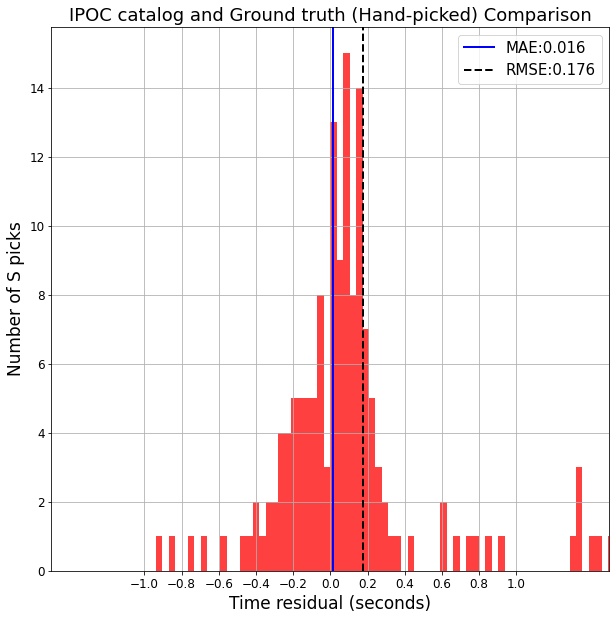

In [9]:
# Filter the time lag with the given threshold and capture the picks with more than .. second time lag
dists_filter_lag_time_m=all_dists_s[np.abs(all_dists_s) < 2000]/1000

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(30,10))

#label_more = '{0}{1}'.format('Recovery ratio \nof S picks with less than \n0.5 seconds: ', round (all_dists_s[np.abs(all_dists_s) < time_lag_threshold].shape[0]/all_dists_s.shape[0],3))

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='r', alpha=0.75)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/40
steps = 0.2
plt.xticks(np.arange(-1, 1.1, step=steps))
plt.xlabel('Time residual (seconds)', fontsize=17)
plt.ylabel('Number of S picks', fontsize=17)
plt.title(title, fontsize=18)
fig_lag_m.set_size_inches(10,10)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)


filter_tim_lag = all_dists_s[np.abs(all_dists_s) < 450]/1000
MAE = np.sum(filter_tim_lag)/filter_tim_lag.shape[0]
RMSE = np.sqrt (np.sum(filter_tim_lag**2)/filter_tim_lag.shape[0])
plt.axvline(MAE, color='blue', label='MAE:'+str(round (MAE,3)),linewidth=2)
plt.axvline(RMSE, color='black', label='RMSE:'+str(round (RMSE,3)), linestyle="--", linewidth=2)

#plt.title('Common S picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
#plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.xlim([-1.5,1.5])
plt.grid(True)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Save png file in the export_DF_path IPOC_vs_HAND_PICKED(GT)_S
file_name = '{0}{1}{2}{3}.{extention}'.format(catalog,'_vs_',GT,'(GT)_S', extention='png')
fig_lag_m.savefig(os.path.join('/home/javak/Sample_data_chile/Phase Report', file_name), facecolor = 'w')



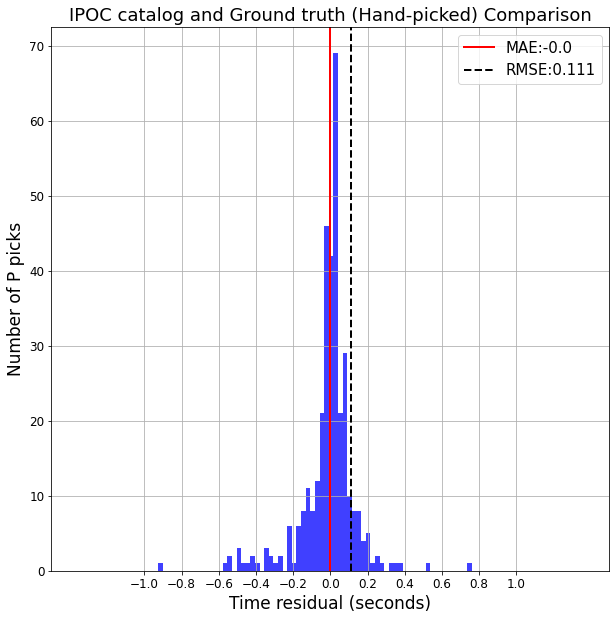

In [10]:
# Filter the time lag with the given threshold and capture the picks with more than .. second time lag
dists_filter_lag_time_m=all_dists_p[np.abs(all_dists_p) < 2000]/1000

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(30,10))
fig_lag_m.set_size_inches(6,6)
#label_more = '{0}{1}'.format('Recovery ratio of P picks with less than 0.5 seconds: ', round (all_dists_p[np.abs(all_dists_p) < time_lag_threshold].shape[0]/all_dists_p.shape[0],3))

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='blue', alpha=0.75)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/40
steps = 0.2
plt.xticks(np.arange(-1, 1.1, step=steps))
plt.xlabel('Time residual (seconds)', fontsize=17)
plt.ylabel('Number of P picks', fontsize=17)
plt.title(title, fontsize=18)
fig_lag_m.set_size_inches(10,10)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

filter_tim_lag = all_dists_p[np.abs(all_dists_p) < 450]/1000
MAE = np.sum(filter_tim_lag)/filter_tim_lag.shape[0]
RMSE = np.sqrt (np.sum(filter_tim_lag**2)/filter_tim_lag.shape[0])
plt.axvline(MAE, color='r', label='MAE:'+str(round (MAE,3)),linewidth=2)
plt.axvline(RMSE, color='black', label='RMSE:'+str(round (RMSE,3)), linestyle="--", linewidth=2)

#plt.title('Common S picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
#plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.xlim([-1.5,1.5])
plt.grid(True)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Save png file in the export_DF_path IPOC_vs_HAND_PICKED(GT)_S
file_name = '{0}{1}{2}{3}.{extention}'.format(catalog,'_vs_',GT,'(GT)_P', extention='png')
fig_lag_m.savefig(os.path.join('/home/javak/Sample_data_chile/Phase Report', file_name), facecolor = 'w')